In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Problem 5: Galileo Galil-AI

Galileo was the first to notice that the period of oscillations remained fairly constant independently of the amplitude of oscillations and the mass. This notion is true but only for small angle deflections.<br> Considering a simple pendulum system, the general undapmped equation of motion is of the form $$\ddot \theta + \frac{g}{L} \sin \theta = 0$$ whose general solution could be obtained by inverting an elleptic integral and does not exhibit a perfect periodic behavior. Hence, generally speaking, the period of oscillations, which depends on the angular frequency of the non periodic oscillations, is not constant.<br>
We can force our equation to produce a perfectly periodic oscillating solution by introducing a Taylor expansion of the sine function. If we only want to study the oscillations about the fixed point ($\theta = 0$), one can expand the sine about this point getting $\sin \theta = \theta$. <br> The equation now has the form $$\ddot \theta + \frac{g}{L} \theta = 0$$ with a solution of the form $$\theta = \sin \left(\sqrt{\frac{g}{L}}t\right)$$ The term $\sqrt{\frac{g}{L}}$ represents the fixed angular frequency of the back and forth motion of mass along the circular trajectory and about the 0 angle.<br> The period of such oscillations is given by $$T = 2\pi \sqrt{\frac{L}{g}}$$ which only depends on the length of the pendulum string and is constant for a fixed length.

To study the dependence relation between T and L, I will use the physics toolbox sensors suite application to measure the angular velocity of small oscillations along the direction of the trajectory of the mass (the mass being my phone and the string being the charger cable). 
To find the period of oscillations from the graph of a sinusoidally varying angular velocity as function of time, we measure the time interval between 2 consecutive peaks or troughs. <br> Finding the values of period for different lengths of the string would be our output and input values that would be used to construct a model that describes the relation between the two. We can then compare it to the theoretical model.

$\textbf{Experiment 1}$: I started with the full length of the charger cable which I measured to be = 99.5 cm and measured the angular velocity components ($w_x, w_y, w_z$) for around 30 seconds. <br> The confusing part was to know which component to take into consideration. Using the coordinate system the application follows, I was swinging my phone along the x direction and hence the angular velocity we care about is along that direction.<br>
The data I collected is noisy so I will only consider the middle 1000 values and I will be using scipy cubic spline interpolating function to interpolate these data.<br>
To find the period, I will identify the indecies of the consecutive maxima and subtract the correponding time values, then find the average.

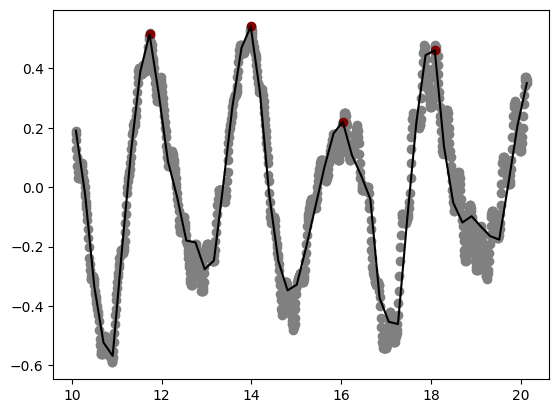

2.11897088394684


In [5]:
with open('exp1.csv', 'r') as file1:
    data1 = file1.readlines()
    data1 = data1[1:]
t1 = []
w1 = []
for line in data1:
    values = line.strip().split(",")
    t1.append(float(values[0]))
    w1.append(float(values[1]))

t1 = t1[1000:2000]
w1 = w1[1000:2000]

interp_func = interp1d(t1, w1, kind='cubic')
new_t1 = np.linspace(min(t1), max(t1), 50)
p1 = interp_func(new_t1)

w1_max = []
t1_max = []
for i in range(len(p1) - 3):
    if p1[i+1] > 0 and p1[i] < p1[i+1] and p1[i+1] > p1[i+2]:
        w1_max.append(p1[i+1])
        t1_max.append(new_t1[i+1])

plt.scatter(t1, w1, color = 'gray')
plt.plot(new_t1, p1, color='k')
plt.scatter(t1_max, w1_max, color = 'maroon')
plt.show()

T1_vals = []
for i in range(len(t1_max)-1):
    T1_vals.append(t1_max[i+1] - t1_max[i])
T1 = np.mean(T1_vals)
print(T1)

$\textbf{Experiment 2}$: Here I folded the cable in 2 to find half its length = 49.75 cm, which I used as my second value for L.

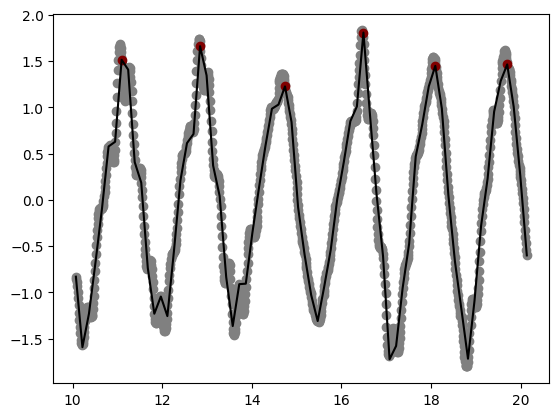

1.7208593057549517


In [6]:
with open('exp2.csv', 'r') as file2:
    data2 = file2.readlines()
    data2 = data2[1:]
t2 = []
w2 = []
for line in data2:
    values = line.strip().split(",")
    t2.append(float(values[0]))
    w2.append(float(values[1]))

t2 = t2[1000:2000]
w2 = w2[1000:2000]

interp_func = interp1d(t2, w2, kind='quadratic')
t2_new = np.linspace(min(t2), max(t2), 70)
p2 = interp_func(t2_new)

w2_max = []
t2_max = []
for i in range(len(p2) - 3):
    if p2[i+1] > 0 and p2[i] < p2[i+1] and p2[i+1] > p2[i+2]:
        w2_max.append(p2[i+1])
        t2_max.append(t2_new[i+1])

plt.scatter(t2, w2, color = 'gray')
plt.plot(t2_new, p2, color='k')
plt.scatter(t2_max, w2_max, color = 'maroon')
plt.show()

T2_vals = []
for i in range(len(t2_max)-1):
    T2_vals.append(t2_max[i+1] - t2_max[i])
T2 = np.mean(T2_vals)
print(T2)

$\textbf{Experiment 3}$: Here I folded the cable in 4, finding the value of 1/4 of its length = 24.875 cm, using it as my third value of L.

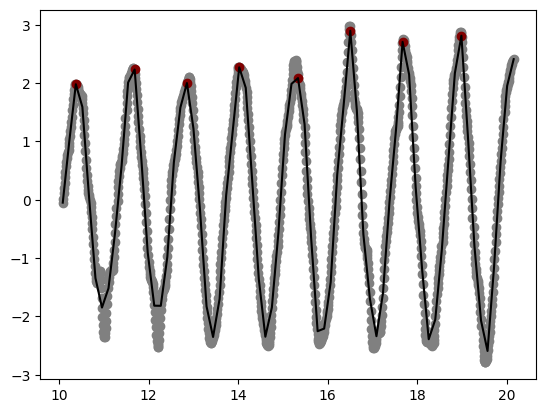

1.2311994353189724


In [7]:
with open('exp3.csv', 'r') as file3:
    data3 = file3.readlines()
    data3 = data3[1:]
t3 = []
w3 = []
for line in data3:
    values = line.strip().split(",")
    t3.append(float(values[0]))
    w3.append(float(values[1]))

t3 = t3[1000:2000]
w3 = w3[1000:2000]

interp_func = interp1d(t3, w3, kind='cubic')
new_t3 = np.linspace(min(t3), max(t3), 70)
p3 = interp_func(new_t3)

w3_max = []
t3_max = []
for i in range(len(p3) - 3):
    if p3[i+1] > 0 and p3[i] < p3[i+1] and p3[i+1] > p3[i+2]:
        w3_max.append(p3[i+1])
        t3_max.append(new_t3[i+1])

plt.scatter(t3, w3, color = 'gray')
plt.plot(new_t3, p3, color='k')
plt.scatter(t3_max, w3_max, color = 'maroon')
plt.show()

T3_vals = []
for i in range(len(t3_max)-1):
    T3_vals.append(t3_max[i+1] - t3_max[i])
T3 = np.mean(T3_vals)
print(T3)

$\textbf{Experiment 4}$: Here I subtracted 15 cm from the full length of the cable (using a ruler) getting 84.5 cm as the fourth value of L.

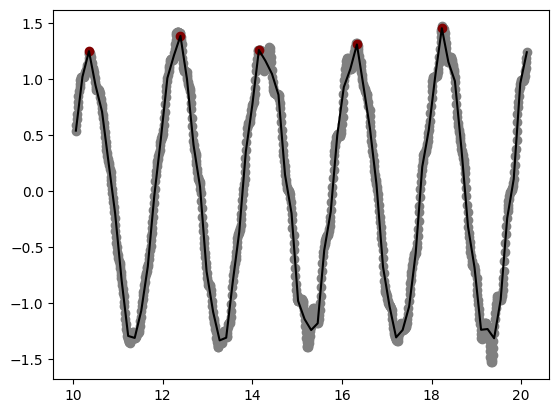

1.9678055825440781


In [8]:
with open('exp4.csv', 'r') as file4:
    data4 = file4.readlines()
    data4 = data4[1:]
t4 = []
w4 = []
for line in data4:
    values = line.strip().split(",")
    t4.append(float(values[0]))
    w4.append(float(values[1]))

t4 = t4[1000:2000]
w4 = w4[1000:2000]

interp_func = interp1d(t4, w4, kind='cubic')
new_t4 = np.linspace(min(t4), max(t4), 70)
p4 = interp_func(new_t4)

w4_max = []
t4_max = []
for i in range(len(p4) - 3):
    if p4[i+1] > 0 and p4[i] < p4[i+1] and p4[i+1] > p4[i+2]:
        w4_max.append(p4[i+1])
        t4_max.append(new_t4[i+1])

plt.scatter(t4, w4, color = 'gray')
plt.plot(new_t4, p4, color='k')
plt.scatter(t4_max, w4_max, color = 'maroon')
plt.show()

T4_vals = []
for i in range(len(t4_max)-1):
    T4_vals.append(t4_max[i+1] - t4_max[i])
T4 = np.mean(T4_vals)
print(T4)

$\textbf{Experiment 5}$: Here I subtracted 30 cm from the full length of the cable (using a ruler) getting 69.5 cm as the fifth value of L.

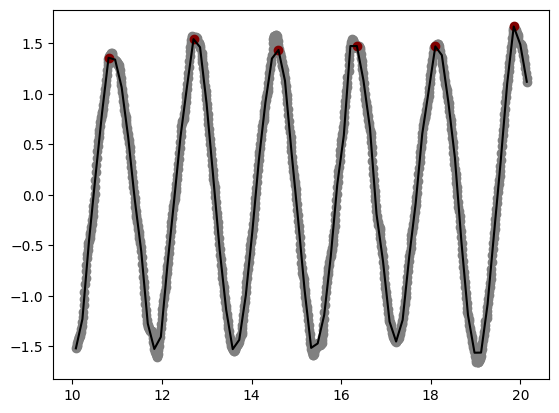

1.809232418779014


In [9]:
with open('exp5.csv', 'r') as file5:
    data5 = file5.readlines()
    data5 = data5[1:]
t5 = []
w5 = []
for line in data5:
    values = line.strip().split(",")
    t5.append(float(values[0]))
    w5.append(float(values[1]))

t5 = t5[1000:2000]
w5 = w5[1000:2000]

interp_func = interp1d(t5, w5, kind='cubic')
new_t5 = np.linspace(min(t5), max(t5), 70)
p5 = interp_func(new_t5)

w5_max = []
t5_max = []
for i in range(len(p5) - 3):
    if p5[i+1] > 0 and p5[i] < p5[i+1] and p5[i+1] > p5[i+2]:
        w5_max.append(p5[i+1])
        t5_max.append(new_t5[i+1])

plt.scatter(t5, w5, color = 'gray')
plt.plot(new_t5, p5, color='k')
plt.scatter(t5_max, w5_max, color = 'maroon')
plt.show()

T5_vals = []
for i in range(len(t5_max)-1):
    T5_vals.append(t5_max[i+1] - t5_max[i])
T5 = np.mean(T5_vals)
print(T5)

We store the values of the period of oscillation in the 5 experiments and the corresponding 5 values of the string length in meters.

In [34]:
output = [T1, T4, T5, T2, T3]
input = [99.5 , 84.5, 69.5, 49.75, 24.875]
input= np.array(input)*1e-2

We know that the model we are trying to recover is of the form $$T = 2\pi\sqrt{\frac{L}{g}}$$ Logging both sides of the expression, we get $$\log (T) = \log(2\pi) + \frac{1}{2} \log \left(\frac{L}{g}\right) = \log(2\pi) - \frac{1}{2} \log(g) + \frac{1}{2}\log(L)$$ Treating $\log (T)$ as our output y and $\log (L)$ as our input x, we get the new model we want to reach which is linear: $$y = ax + b$$ where $a = \frac{1}{2}$ and $b = \log(2\pi) - \frac{1}{2} \log(g) $.<br> We make use of this by  logging our output (period) values and input values (length) then build our feature vector to be of the form $$X = [1, \log(L)]$$ The corresponding optimal coefficents of this Linear Regression problem can then be found by solving the normal equation $$X^TX w^* = X^Ty$$

Before splitting the data into testing and training sets using sklearn function train_test_split, I will shuffle the data by randomly permutating their indecies.

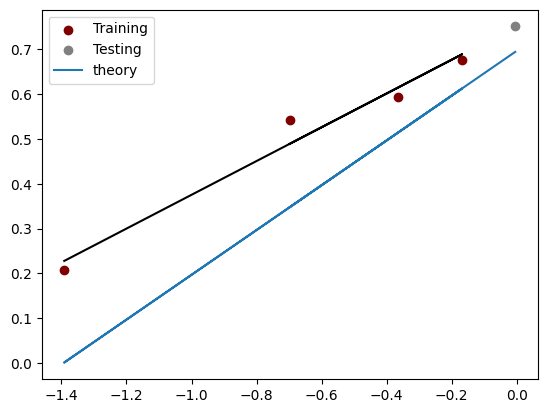

In [43]:
input = np.log(input)
output = np.log(output)

shuffled_indices = np.random.permutation(len(output))
input = [input[i] for i in shuffled_indices]
output = [output[i] for i in shuffled_indices]
input_train, input_test, output_train, output_test = train_test_split(input, output, shuffle = False, test_size = 0.1)


plt.scatter(input_train, output_train, color = 'maroon', label ='Training')
plt.scatter(input_test, output_test, color = 'gray', label = 'Testing')



# Building the feature vector and solving the normal equation (Linear regression):
X = np.array([np.ones(len(input_train)), input_train]).T
X_new = np.transpose(X) @ X
y = np.transpose(X) @ np.array(output_train).T
coef_vect = np.linalg.solve(X_new, y) 
p = 0
for i in range(2):
    p += coef_vect[i]* np.array(input_train)**i


# theoretical model:
T = np.log(2*np.pi) - (1/2)*np.log(9.8) + (1/2)*np.array(input)

plt.plot(input, T, label = "theory")
plt.plot(input_train, p, color = 'k')
plt.legend()
plt.show()

We saw above that the bias term have the form $b = \log(2\pi) - \frac{1}{2} \log(g)$. Solving for g, we find that $$g = e^{-2b + 2 \log (2\pi)}$$

In [36]:
g = np.exp(-2*coef_vect[0] + 2*np.log(2*np.pi))
print(g)

8.7692229968354


This is a bad prediction of the value of Earth's gravitational acceleration, which is $\approx$ 9.8 m/$s^2$. But given our measurement techniques, the uncertainties in the values of the different lengths of the charge cable and the collected data, and the small amount of our data set, we would not expect perfect results.

From previously scattering the data, we see that they are not that good, meaning they diverge from the theoretical plot, but they nonetheless do seem they can be fitted using a polynomial function. I will try using another way to fit them (without logging them) by introducing an "order" value and contruct the feature vector in such a way that takes the input values and raises them to the powers (0, ... , order). Then apply linear regression and find the fitting polynomial.

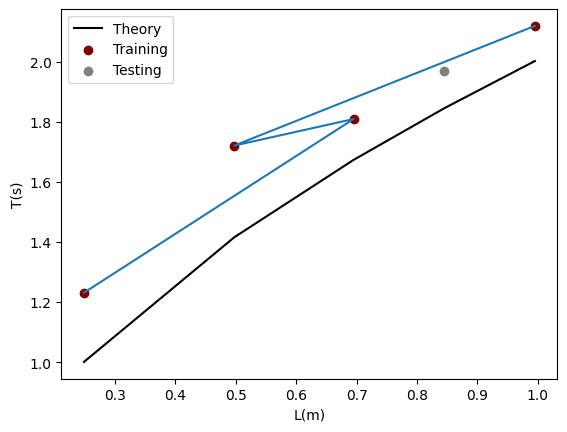

In [50]:
output = [T1, T4, T5, T2, T3]
input = [99.5 , 84.5, 69.5, 49.75, 24.875]
input= np.array(input)*1e-2

T = 2*np.pi*(np.sqrt(np.array(input)/9.8)) # Theoretical value
plt.plot(input, T, color = 'k', label = 'Theory')


shuffled_indices = np.random.permutation(len(output))

input = [input[i] for i in shuffled_indices]
output = [output[i] for i in shuffled_indices]

input_train, input_test, output_train, output_test = train_test_split(input, output, shuffle = False, test_size = 0.1)
plt.scatter(input_train, output_train, color = 'maroon', label ='Training')
plt.scatter(input_test, output_test, color = 'gray', label = 'Testing')

order = 4
n = len(input_train)
X = np.zeros((n, order+1))
for i in range(1, order+1):
    X[:, i] = np.array(input_train)**i

ridge = LinearRegression()
ridge.fit(X, output_train)

coef = ridge.coef_
bias = ridge.intercept_

ridge_model = bias
for i in range(len(np.array(coef))):
    ridge_model += coef[i]*X[:,i]

plt.plot(input_train, ridge_model)
plt.ylabel("T(s)")
plt.xlabel("L(m)")
plt.legend()
plt.show()

To find the value of g from this model, we solve $T = 2\pi\sqrt{\frac{L}{g}}$ for g, getting $$g = \frac{4\pi^2L}{T^2}$$

In [52]:
g = (4*np.pi**2 * np.array(input_train))/(ridge_model**2)
print(np.mean(g))

7.560321148511907


This model, for an order > 2, overfits the data and hence we expect it to return a worst value for g than the log model we studied before.

The 5 experiments I performed were not enough to produce data that exhibit clearly the underlying dynamics of the studied pendulum system. We see how the models we developed are not perfectly consistent with the theoretical model.